# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุลของสมาชิกในทีม</span>
# <span style="color: blue;">(ห้ามมีสมาชิกเกิน 2 คน)</span>
## รหัสนิสิต ชื่อ-นามสกุล
# 6610450757 กฤตัชญ์ บุญตาราษฎร์
# 6610450871 ชนพัฒน์ โชติกุลรัตน์

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (4000, 3)
shape of y is (4000,)


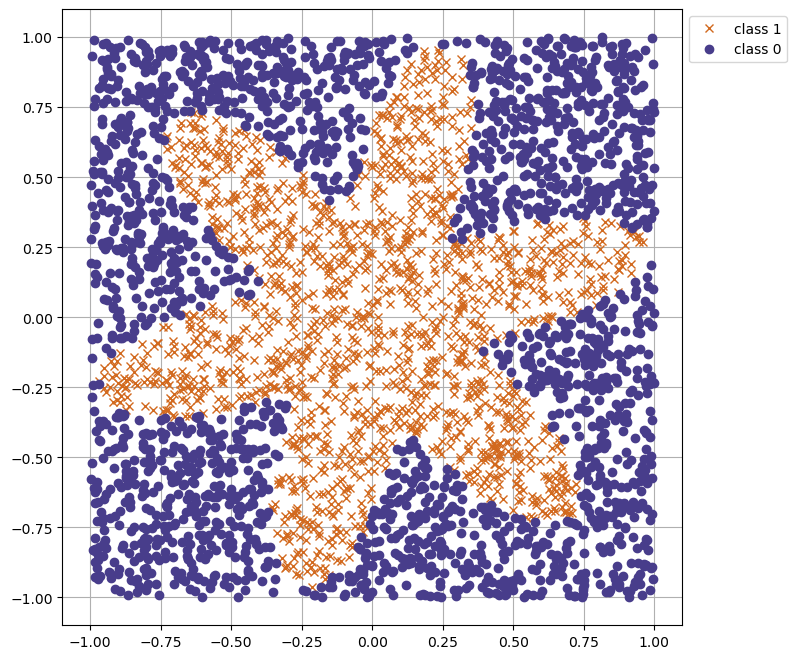

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

np.random.seed(12345)

num_obs = 4000
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

# 5-petal flower shape
r = np.sqrt(x_mat_full[:, 0] ** 2 + x_mat_full[:, 1] ** 2)
theta = np.arctan2(x_mat_full[:, 1], x_mat_full[:, 0])
y = (r < (0.7 + 0.3 * np.sin(6 * theta))).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig,  ax = plt.subplots(figsize=(8, 8))
ax.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'x', label='class 1', color='chocolate')
ax.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'o', label='class 0', color='darkslateblue')
ax.grid(True)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1-eps))
    return -(np.sum(y_true*np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W_1, W_2, x_mat, y):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # First,  compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat), ))
    # Now compute the gradient
    J_z_3_grad = y_pred - y
    J_W_2_grad = np.dot(J_z_3_grad, a_2).reshape(-1, 1)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), W_2.reshape(-1, 1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 7))
    fig.suptitle('Log Loss and Accuracy over iterations')

    epochs = np.arange(1, len(loss_vals) + 1)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epochs, loss_vals)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(epochs, accuracies)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

## <span style="color: green;">(30 คะแนน) ปรับเพิ่มโค้ดใน Cell ด้านล่างเพื่อให้โมเดลเรียนรู้จากข้อมูลและแสดงให้เห็นว่าโมเดลให้ค่า accuracy ไม่น้อยกว่า 75%</span>

at 200 epochs: loss is 0.5661298325377265 and accuracy is 0.71025
at 400 epochs: loss is 0.5594332313250163 and accuracy is 0.7185
at 600 epochs: loss is 0.5587101988934565 and accuracy is 0.72025
at 800 epochs: loss is 0.5581206239623985 and accuracy is 0.7195
at 1000 epochs: loss is 0.5833611690351926 and accuracy is 0.76
at 1200 epochs: loss is 0.4992719910295499 and accuracy is 0.755
at 1400 epochs: loss is 0.49019468949568645 and accuracy is 0.76975
at 1600 epochs: loss is 0.48821853606934995 and accuracy is 0.78075
at 1800 epochs: loss is 0.48779099924798447 and accuracy is 0.7885
at 2000 epochs: loss is 0.487820616271503 and accuracy is 0.79025


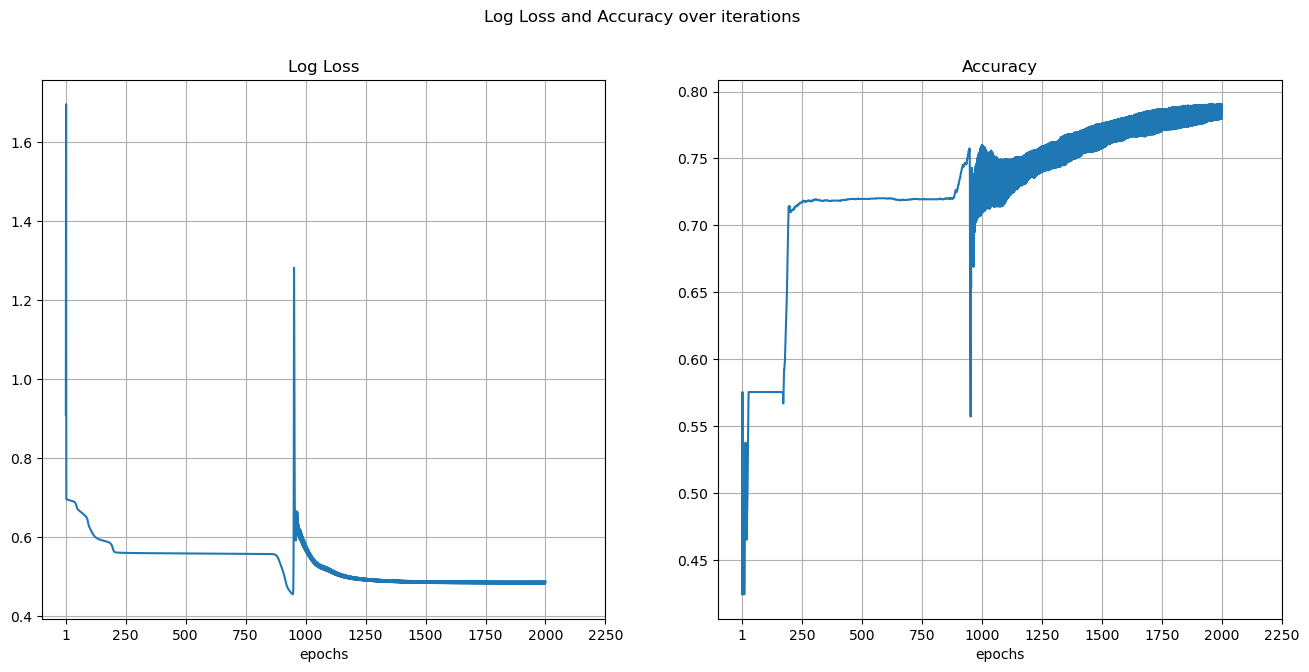

In [4]:
#### Initialize the network parameters
np.random.seed(12345)

W_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], 3))
W_2 = np.random.uniform(-1, 1, (3, 1))
num_epochs = 2000
learning_rate = 4e-3
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(1, num_epochs+1):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad,J_W_2_grad) = forward_pass(W_1, W_2, x_mat, y)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    ### Compute the loss and accuracy
    loss1 = loss_fn(y, y_pred)
    loss_vals.append(loss1)
    acc1 = np.mean(y == (y_pred > 0.5))
    accuracies.append(np.mean(y == (y_pred > 0.5)))


    ## Print the loss and accuracy for every 200th iteration
    if (i % 200 == 0):
      print(f'at {i} epochs: loss is {loss1} and accuracy is {acc1}')



plot_loss_accuracy(loss_vals, accuracies)

## <span style="color: green;">(30 คะแนน) ปรับโครงสร้างโมเดลและค่า hyperparameter ที่เห็นสมควร พร้อมอธิบายสิ่งที่ได้ปรับและเหตุผล เพื่อให้โมเดลมีประสิทธิภาพที่ให้ค่า accuracy ไม่น้อยกว่า 95%</span>

In [5]:
def forward_pass_4_layers(W_1, W_2, W_3, W_4, x_mat, y):
    # First,  compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)

    z_3 = np.dot(a_2, W_2)
    a_3 = sigmoid(z_3)

    z_4 = np.dot(a_3, W_3)
    a_4 = sigmoid(z_4)

    z_5 = np.dot(a_4, W_4)
    y_pred = sigmoid(z_5).reshape(len(x_mat), )

    # Now compute the gradient
    J_z5_grad = y_pred - y

    J_W4_grad = np.dot(a_4.T, J_z5_grad.reshape(-1, 1))
    a4_z4_grad = sigmoid(z_4) * (1 - sigmoid(z_4))
    delta4 = np.dot(J_z5_grad.reshape(-1, 1), W_4.T) * a4_z4_grad

    J_W3_grad = np.dot(a_3.T, delta4)
    a3_z3_grad = sigmoid(z_3) * (1 - sigmoid(z_3))
    delta3 = np.dot(delta4, W_3.T) * a3_z3_grad

    J_W2_grad = np.dot(a_2.T, delta3)
    a2_z2_grad = sigmoid(z_2) * (1 - sigmoid(z_2))
    delta2 = np.dot(delta3, W_2.T) * a2_z2_grad

    J_W1_grad = np.dot(x_mat.T, delta2)

    gradients = (J_W1_grad, J_W2_grad, J_W3_grad, J_W4_grad)
    return y_pred, gradients

Epoch 200: Loss = 0.5544, Accuracy = 0.7338, lr = 0.0020
Epoch 400: Loss = 0.5038, Accuracy = 0.7668, lr = 0.0020
Epoch 600: Loss = 0.3814, Accuracy = 0.8123, lr = 0.0018
Epoch 800: Loss = 0.3007, Accuracy = 0.8430, lr = 0.0018
Epoch 1000: Loss = 0.2390, Accuracy = 0.8815, lr = 0.0018
Epoch 1200: Loss = 0.1908, Accuracy = 0.9143, lr = 0.0016
Epoch 1400: Loss = 0.1629, Accuracy = 0.9277, lr = 0.0016
Epoch 1600: Loss = 0.1380, Accuracy = 0.9400, lr = 0.0015
Epoch 1800: Loss = 0.1290, Accuracy = 0.9453, lr = 0.0015
Epoch 2000: Loss = 0.1216, Accuracy = 0.9483, lr = 0.0015
Epoch 2200: Loss = 0.1104, Accuracy = 0.9525, lr = 0.0013
Epoch 2400: Loss = 0.1068, Accuracy = 0.9537, lr = 0.0013
Epoch 2600: Loss = 0.0967, Accuracy = 0.9575, lr = 0.0012
Epoch 2800: Loss = 0.0941, Accuracy = 0.9580, lr = 0.0012
Epoch 3000: Loss = 0.0905, Accuracy = 0.9595, lr = 0.0012
Epoch 3200: Loss = 0.0817, Accuracy = 0.9635, lr = 0.0011
Epoch 3400: Loss = 0.0791, Accuracy = 0.9653, lr = 0.0011
Epoch 3600: Loss =

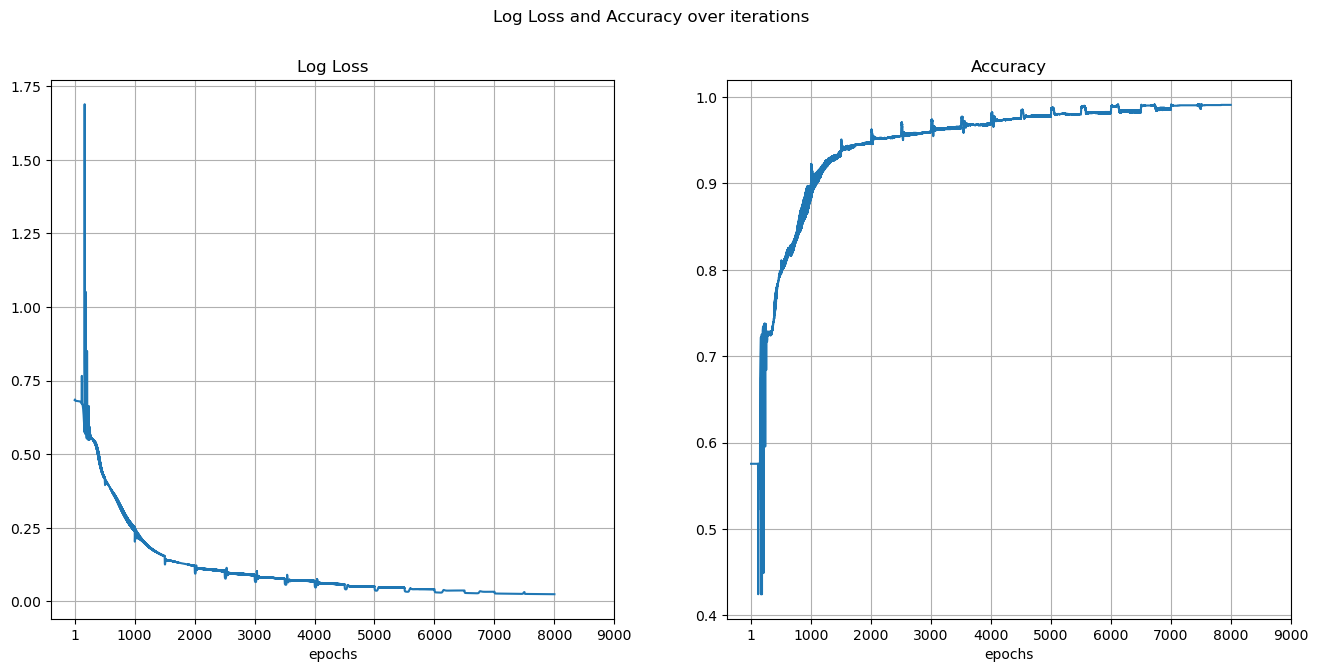

In [6]:
#hidden layers
W_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], 16))
W_2 = np.random.uniform(-1, 1, (W_1.shape[-1], 8))
W_3 = np.random.uniform(-1, 1, (W_2.shape[-1], 4))

#output layers
W_4 = np.random.uniform(-1, 1, (W_3.shape[-1], 1))

num_epochs = 8000
learning_rate = 2e-3
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(1, num_epochs+1):
    ### Do a forward computation, and get the gradient
    y_pred, (grad1, grad2, grad3, grad4) = forward_pass_4_layers(W_1, W_2, W_3, W_4, x_mat, y)

    ## Update the weight matrices
    W_1 -= learning_rate * grad1
    W_2 -= learning_rate * grad2
    W_3 -= learning_rate * grad3
    W_4 -= learning_rate * grad4

    # Compute loss and accuracy
    loss1 = loss_fn(y, y_pred)
    acc1 = np.mean(y == (y_pred > 0.5))
    loss_vals.append(loss1)
    accuracies.append(acc1)

    if i % 200 == 0:
        print(f"Epoch {i}: Loss = {loss1:.4f}, Accuracy = {acc1:.4f}, lr = {learning_rate:.4f}")

    if i %500==0:
        learning_rate*=0.9

plot_loss_accuracy(loss_vals, accuracies)



## สิ่งที่เพิ่มหรือดัดแปลงจาก code ตัวอย่าง

1. ขยาย Layers เป็น 4 ชั้น (3 hidden layers มี neuron เป็น 16, 8 และ 4 ตามลำดับ และ 1 ที่เป็น output)
    - เหตุผลที่ดีกว่า: เมื่อโมเดลมีจำนวน layer มากขึ้น ทำให้สามารถเรียนรู้จากข้อมูลInputที่ซับซ้อนและมีลำดับชั้นได้ดีกว่า

2. เพิ่มจำนวน Epochs เป็น 8000 รอบ
    - เหตุผลที่ดีกว่า: ด้วยโมเดลที่ลึกและซับซ้อนขึ้น การมีจำนวน epochs ที่มากจะทำให้โมเดลเรียนรู้ได้ดี

3. ใช้ Learning Rate Schedule
    - learning rate มีค่าเริ่มต้นที่ 2e-3 และจะถูกคูณด้วย 0.9 ทุกๆ epochs ที่ 500 
    - เหตุผลที่ดีกว่า: Learning Rate Schedule เป็นเทคนิคที่ช่วยในการปรับปรุงความเสถียรและประสิทธิภาพของการ train ทั้งนี้จากการสังเกตุลดการเกิด overshoot ของการลดค่า weight 



## <span style="color: green;">(20 คะแนน) ให้วาดกราฟของคลาส Positive และ Negative ที่ทำนายถูกและไม่ถูก และให้แสดง Confustion Matrix ดังตัวอย่างในรูป และให้เขียนอธิบายสิ่งที่สังเกตได้จากกราฟทั้งสอง</span>
![](https://drive.google.com/thumbnail?id=156xTSDBMlhHJBlVnBG2KvOeUt-reneE0&sz=w642)
![](https://drive.google.com/thumbnail?id=16lVXq3JWbGlw_QRx1_YWBQvMXL0DdsjH&sz=w482)

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y,y_pred_result):
    cm = confusion_matrix(y,y_pred_result)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

    fig, ax = plt.subplots(figsize=(4,4))
    disp.plot(cmap=plt.cm.Blues, ax=ax)

    ax.set_xlabel("Actuals")
    ax.set_ylabel("Predictions")
    plt.title("Confusion Matrix")
    plt.show()

def plot__scatter(x_mat, y_true, y_pred_result, feature_indices=(0,1)):
    TP = (y_true == 1) & (y_pred_result == 1)
    TN = (y_true == 0) & (y_pred_result == 0)
    FP = (y_true == 0) & (y_pred_result == 1)
    FN = (y_true == 1) & (y_pred_result == 0)

    X1 = x_mat[:, feature_indices[0]]
    X2 = x_mat[:, feature_indices[1]]

    X1_norm = 2 * (X1-X1.min())/(X1.max()-X1.min())-1
    X2_norm = 2 * (X2-X2.min())/(X2.max()-X2.min())-1

    plt.figure(figsize=(5,5))
    plt.scatter(X1_norm[TP], X2_norm[TP], color='blue', label='True Positive', marker='.', alpha=0.7)
    plt.scatter(X1_norm[TN], X2_norm[TN], color='orange', label='True Negative', marker='*', alpha=0.7)
    plt.scatter(X1_norm[FP], X2_norm[FP], color='green', label='False Positive', marker='v', alpha=0.7)
    plt.scatter(X1_norm[FN], X2_norm[FN], color='red', label='False Negative', marker='X', alpha=0.7)

    plt.title('Truth vs Prediction')
    plt.legend()
    plt.grid(True)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Classes')
    plt.show()

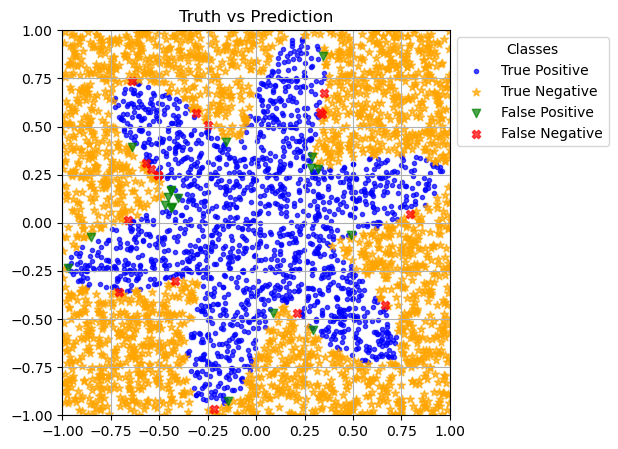

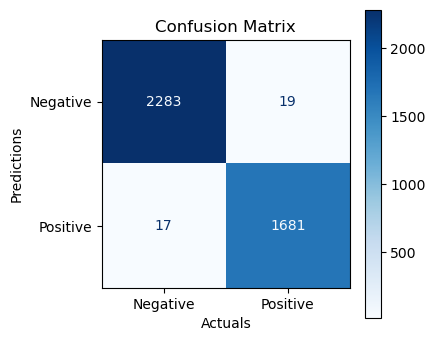

In [44]:
y_pred_result = y_pred > 0.5
correct_prediction = (y_pred_result == y)

plot__scatter(x_mat,y,y_pred_result,feature_indices=(0,1))
plot_confusion_matrix(y,y_pred_result)

# กราฟ Scatter Plot
 การกระจายตัวของข้อมูล:

- True Positive (วงกลมสีน้ำเงิน): จุดที่โมเดลทำนายถูกต้องสำหรับคลาส Positive 
- True Negative (ดาวสีส้ม): จุดที่โมเดลทำนายถูกต้องสำหรับคลาส Negative
- False Positive (สามเหลี่ยมสีเขียว): จุดที่โมเดลทำนายผิด (ทำนายเป็น Positive แต่ y ค่าจริงเป็น Negative) 
- False Negative (กากบาทสีแดง): จุดที่โมเดลทำนายผิด (ทำนายเป็น Negative แต่ y ค่าจริงป็น Positive)
 
 จุดสังเกต:

- ค่าที่โมเดลทำนายได้ผิดทั้ง False Positive และ False Negative เป็นพื้นที่ขอบเขตระหว่างคลาส Negative และ Positive โดยพบว่ามีจำนวนน้อย สื่อถึงการที่โมเดลทำงานได้ดี
- ค่าที่โมเดลทำนายได้ถูกต้องทั้ง True Positive และ True Negative สามารถแยกออกจากกันเห็นเป็นรูปร่างได้อย่างชัดเจน
# กราฟ Confusion Matrix
 โครงสร้างของ Confusion Matrix:

- แกนแนวตั้ง (Predictions): ผลการทำนายค่า y ของโมเดล
- แกนแนวนอน (Actuals): ข้อมูลจริง
- ช่องสีน้ำเงินซ้ายบน คือ True Negative (ทำนายถูกว่า "ไม่ใช่")
- ช่องสีน้ำเงินขวาล่าง คือ True Positive (ทำนายถูกว่า "ใช่")
- ช่องสีขาวบนขวา คือ False Positive (ทำนายผิด คิดว่า "ใช่" แต่ค่าจริงคือ "ไม่ใช่")
- ช่องสีขาวล่างซ้าย คือ False Negative (ทำนายผิด คิดว่า "ไม่ใช่" แต่ค่าจริงคือ "ใช่")

 จุดสังเกต:

- จาก confusion matrix แสดงให้เห็นว่าโมเดลสามารถแยกแยะคลาส Positive และ Negative ได้ดีมาก โดยมีจำนวนที่ทายผิดอยู่ 36 ค่า ซึ่งคิดเป็น 0.9% ของทั้งหมด ซึ่งสอดคล้องกับค่า accuracy ของโมเดลที่มีค่าอยู่ที่ 99.1%



## <span style="color: green;">(20 คะแนน) ใช้โมเดลที่เทรนได้ค่า accuracy ตามที่โจทย์กำหนด ให้แสดงรายการข้อมูลที่โมเดลทำนายผิดของแต่ละคลาสมาอย่างละ 3 รายการ หรือหากมีจำนวนน้อยกว่า ให้แสดงเท่าที่มี</span>

In [46]:
def show_example_misclassified(y, y_pred):
    misclassified = (y != y_pred)
    misclassified_indices = np.where(misclassified)[0]

    false_positives_indices = [i for i in misclassified_indices if y[i] == 0]
    false_negatives_indices = [i for i in misclassified_indices if y[i] == 1]

    print("ตัวอย่างค่าที่โมเดลทำนายผิดแบบ False Positive (ทำนายเป็น 1 แต่ค่าจริงคือ 0):")
    for i in false_positives_indices[:3]:
        print(f"Index {i} | Y_true: {y[i]==1} | Y_pred: {y_pred[i]}")


    print("\nตัวอย่างค่าที่โมเดลทำนายผิดแบบ False Negative (ทำนายเป็น 0 แต่ค่าจริงคือ 1):")
    for i in false_negatives_indices[:3]:
        print(f"Index {i} | Y_true: {y[i]==1} | Y_pred: {y_pred[i]}")

In [47]:
show_example_misclassified(y, y_pred_result)

ตัวอย่างค่าที่โมเดลทำนายผิดแบบ False Positive (ทำนายเป็น 1 แต่ค่าจริงคือ 0):
Index 182 | Y_true: False | Y_pred: True
Index 628 | Y_true: False | Y_pred: True
Index 637 | Y_true: False | Y_pred: True

ตัวอย่างค่าที่โมเดลทำนายผิดแบบ False Negative (ทำนายเป็น 0 แต่ค่าจริงคือ 1):
Index 205 | Y_true: True | Y_pred: False
Index 215 | Y_true: True | Y_pred: False
Index 460 | Y_true: True | Y_pred: False
